In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Union, List, Dict
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import talib

In [3]:
# Load historical datasets

aapl_df = pd.read_csv("../data/yfinance_data/AAPL_historical_data.csv")
amzn_df = pd.read_csv("../data/yfinance_data/AMZN_historical_data.csv")
goog_df = pd.read_csv("../data/yfinance_data/GOOG_historical_data.csv")
meta_df = pd.read_csv("../data/yfinance_data/META_historical_data.csv")
msft_df = pd.read_csv("../data/yfinance_data/MSFT_historical_data.csv")
nvda_df = pd.read_csv("../data/yfinance_data/NVDA_historical_data.csv")
tsla_df = pd.read_csv("../data/yfinance_data/TSLA_historical_data.csv")

In [ ]:
# Parse date to datetime format
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
goog_df['Date'] = pd.to_datetime(goog_df['Date'])
meta_df['Date'] = pd.to_datetime(meta_df['Date'])
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])

In [ ]:
# check the columns
tsla_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

In [ ]:
# Store All DataFrames in a Dictionary 
stock_dfs = {
    'AAPL': aapl_df,
    'AMZN': amzn_df,
    'GOOG': goog_df,
    'META': meta_df,
    'MSFT': msft_df,
    'NVDA': nvda_df,
    'TSLA': tsla_df
}

In [7]:
def apply_ta_indicators(df):
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(
        df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    return df

In [8]:
# Calculate SMA, RSI and MACD
for ticker, df in stock_dfs.items():
    stock_dfs[ticker] = apply_ta_indicators(df)

In [9]:
aapl_df = stock_dfs['AAPL']
amzn_df = stock_dfs['AMZN']
goog_df = stock_dfs['GOOG']
meta_df = stock_dfs['META']
msft_df = stock_dfs['MSFT']
nvda_df = stock_dfs['NVDA']
msft_df = stock_dfs['MSFT']

In [10]:
tsla_df[['Date', 'Close', 'SMA_20', 'SMA_50', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']].tail(10)

,Date,Close,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,MACD_hist
3535,2024-07-17,248.500000,223.778000,195.6922,65.715141,19.134324,17.754460,1.379865
3536,2024-07-18,249.229996,226.996500,196.9816,66.005487,18.309263,17.865420,0.443843
3537,2024-07-19,239.199997,229.877999,198.2094,58.655486,16.654081,17.623152,-0.969071
3538,2024-07-22,251.509995,233.302999,199.7452,63.959876,16.149490,17.328420,-1.178930
3539,2024-07-23,246.380005,236.492999,201.2334,60.477660,15.160886,16.894913,-1.734027
3540,2024-07-24,215.990005,237.924999,202.1838,44.886918,11.789291,15.873789,-4.084498
3541,2024-07-25,220.250000,239.118999,203.1510,46.951389,9.353206,14.569672,-5.216466
3542,2024-07-26,219.800003,240.238000,203.9960,46.752165,7.302106,13.116159,-5.814053
3543,2024-07-29,232.100006,241.949000,205.1582,52.664511,6.593101,11.811547,-5.218447
3544,2024-07-30,222.619995,242.587000,206.1138,48.220474,5.206237,10.490485,-5.284248


Plot Moving Averages (SMA_20 vs SMA_50)

In [11]:
stock_dfs = {
    'AAPL': aapl_df,
    'AMZN': amzn_df,
    'GOOG': goog_df,
    'META': meta_df,
    'MSFT': msft_df,
    'NVDA': nvda_df,
    'TSLA': tsla_df
}

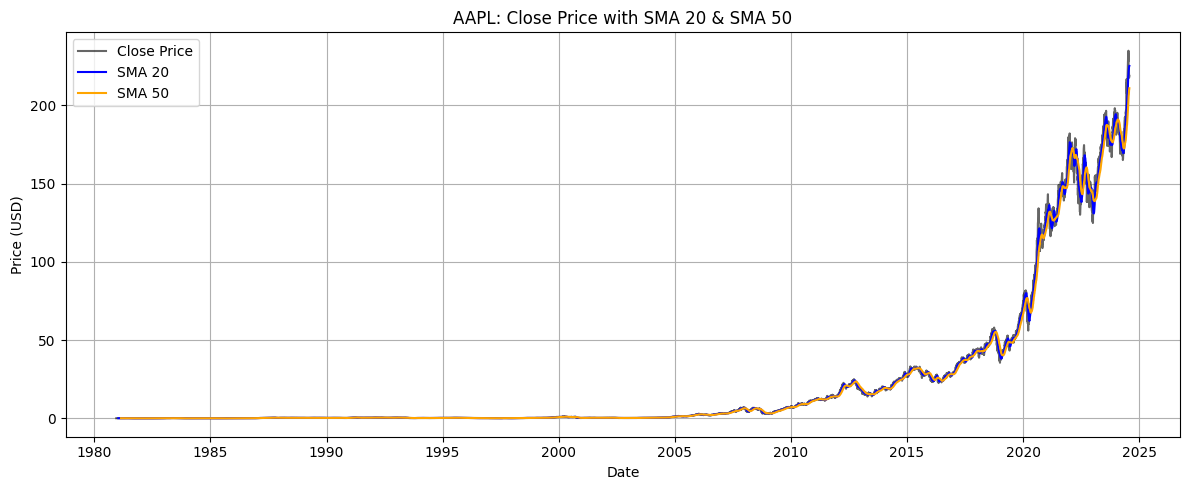

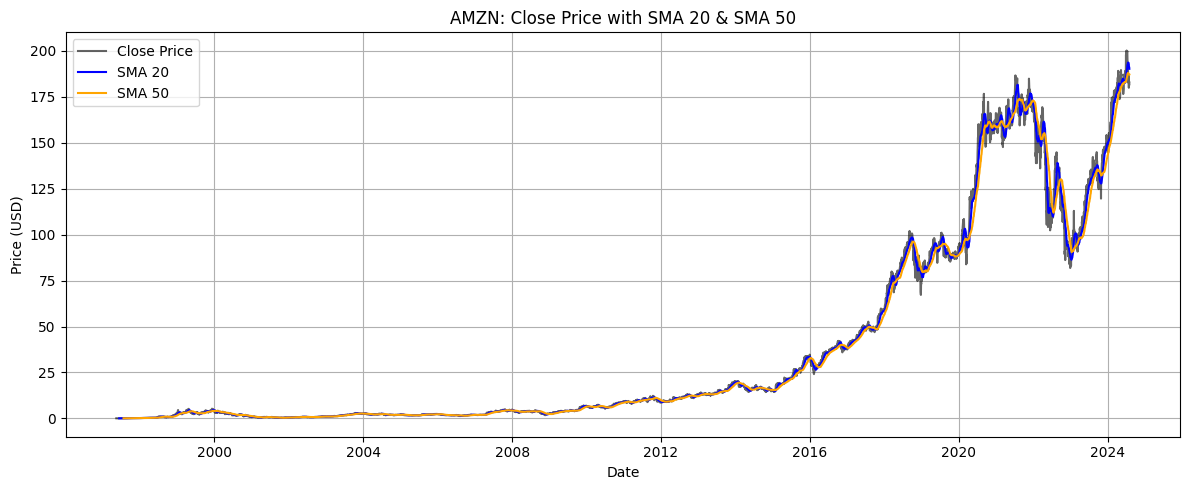

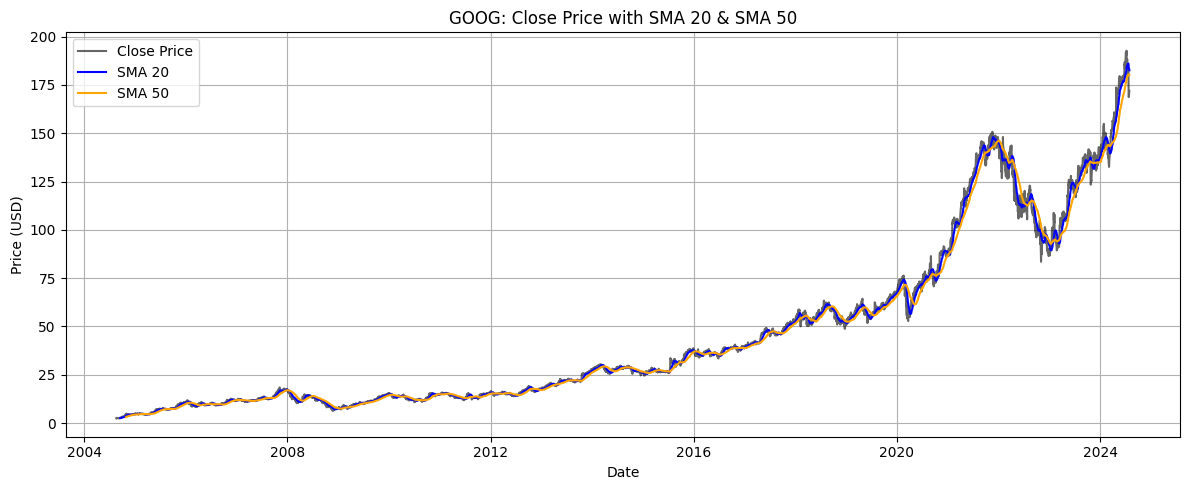

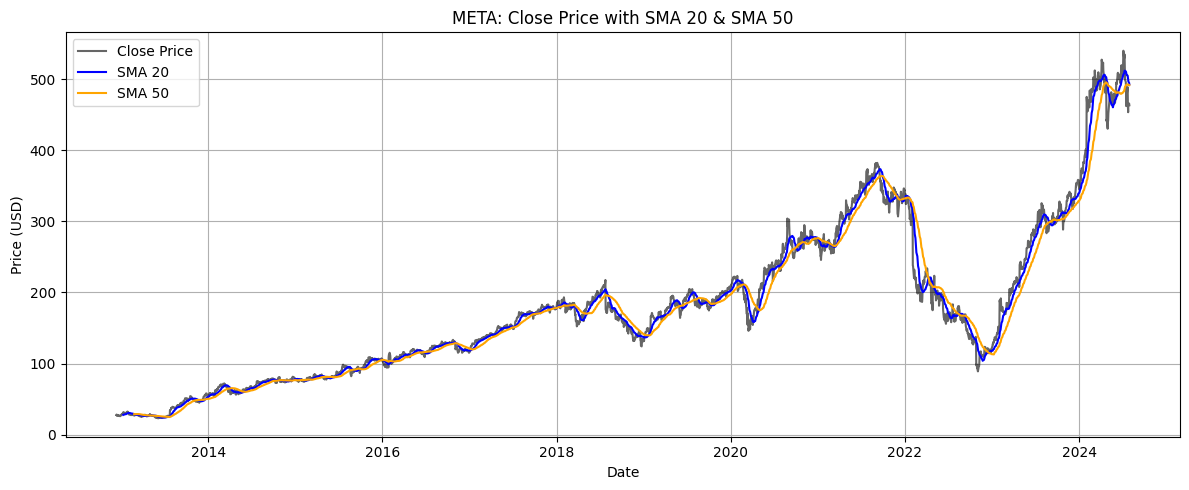

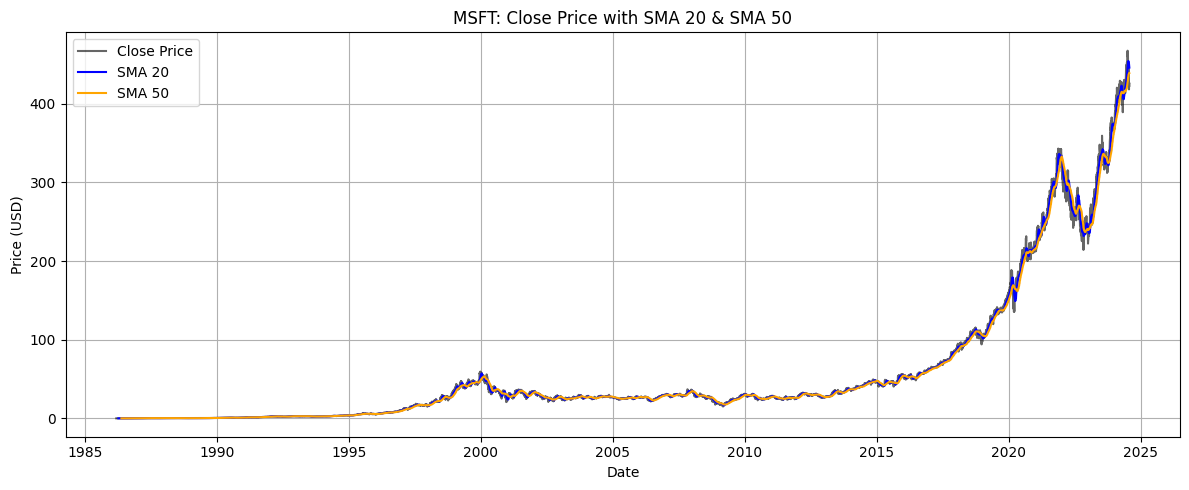

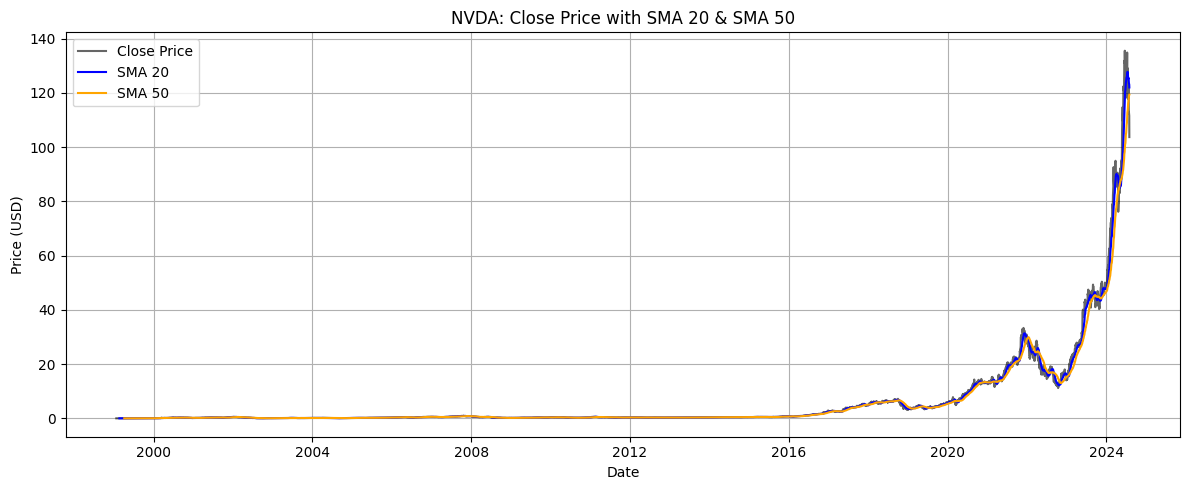

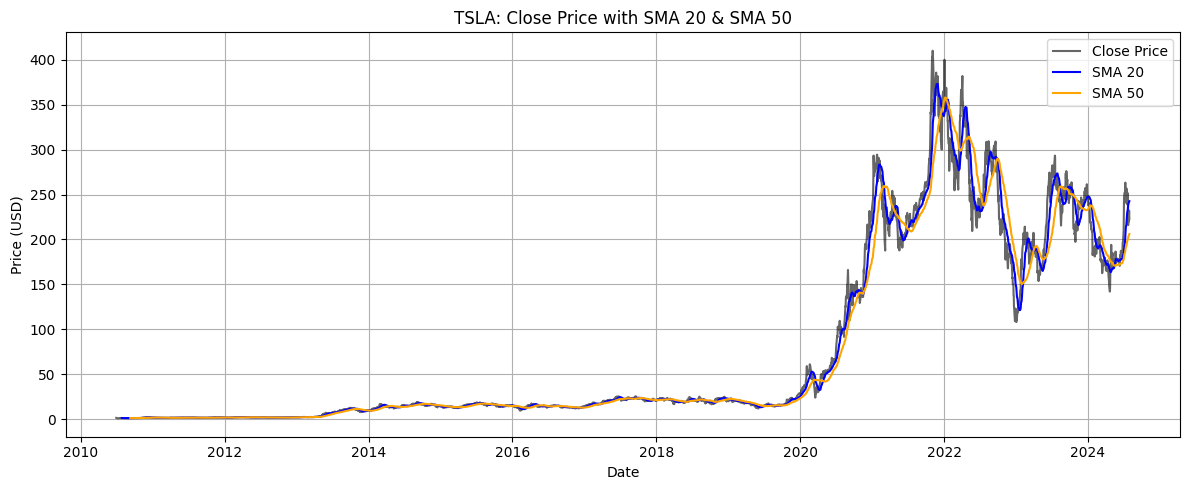

In [12]:
for ticker, df in stock_dfs.items():
    plt.figure(figsize=(12, 5))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='black', alpha=0.6)
    plt.plot(df['Date'], df['SMA_20'], label='SMA 20', color='blue')
    plt.plot(df['Date'], df['SMA_50'], label='SMA 50', color='orange')
    
    plt.title(f"{ticker}: Close Price with SMA 20 & SMA 50")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
